In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
enrol_data<-read_csv("Data/Enrolment_Data.csv")
bed_data_read<-read_csv("Data/housing-students-ubc-2007-2023.csv")
head(enrol_data)

Rows: 12 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): year, enrolment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Fiscal Year
dbl (5): Chart Year, Student Beds (UBCV), Student Beds (UBCO), Percentage ch...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,enrolment
<dbl>,<dbl>
2012,8438
2013,9371
2014,10903
2015,12117
2016,13182
2017,14685


In [3]:
glimpse(enrol_data)
summary(enrol_data)

Rows: 12
Columns: 2
$ year      <dbl> 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, …
$ enrolment <dbl> 8438, 9371, 10903, 12117, 13182, 14685, 15405, 16098, 15504,…


      year        enrolment    
 Min.   :2012   Min.   : 8438  
 1st Qu.:2015   1st Qu.:11814  
 Median :2018   Median :15045  
 Mean   :2018   Mean   :13897  
 3rd Qu.:2020   3rd Qu.:16274  
 Max.   :2023   Max.   :17243  

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


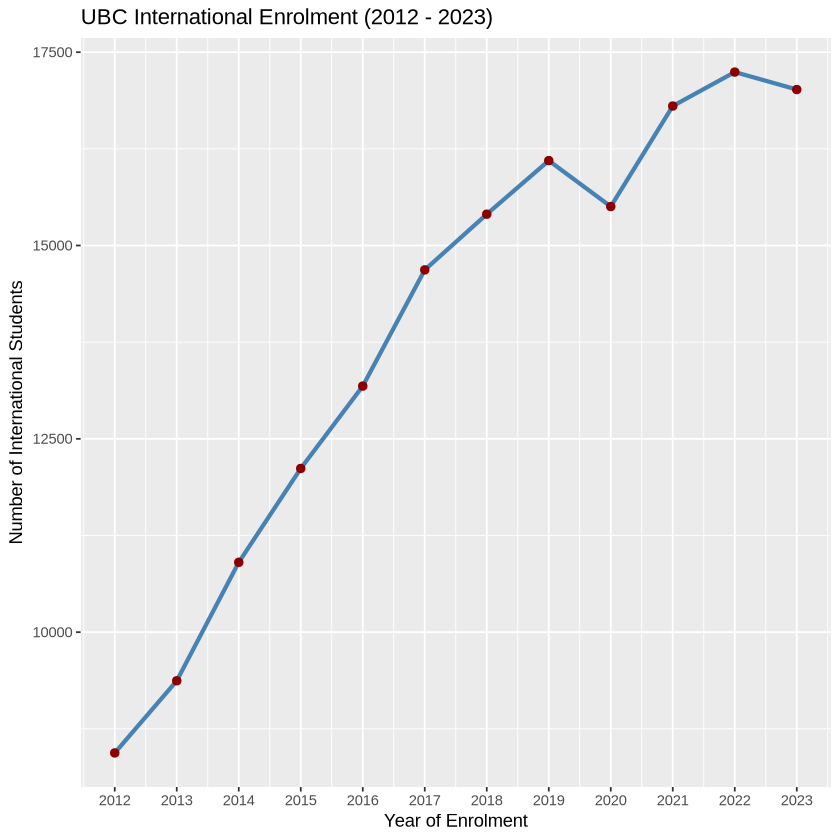

In [4]:
enrol_plot<-ggplot(data=enrol_data,aes(x = year, y = enrolment))+
            geom_line(color = "steelblue", size = 1.2)+
            geom_point(color = "darkred", size = 2) +
            scale_x_continuous(breaks = enrol_data$year)+
            labs(title = "UBC International Enrolment (2012 - 2023)",
            x = "Year of Enrolment", y = "Number of International Students") 

enrol_plot

In [5]:
#cleaning the data for the students beds available in residence starting from year 2012 to 2023
bed_data<-bed_data_read|>
filter(`Chart Year`>=2012)|>
select(year = `Chart Year` , beds = `Student Beds (UBCV)`)
head(bed_data)

year,beds
<dbl>,<dbl>
2012,9432
2013,10041
2014,9989
2015,10543
2016,11038
2017,11795


In [8]:
combined_data<-enrol_data|>
left_join(bed_data,by="year")
combined_data

year,enrolment,beds
<dbl>,<dbl>,<dbl>
2012,8438,9432
2013,9371,10041
2014,10903,9989
2015,12117,10543
2016,13182,11038
2017,14685,11795
2018,15405,11795
2019,16098,12425
2020,15504,12425


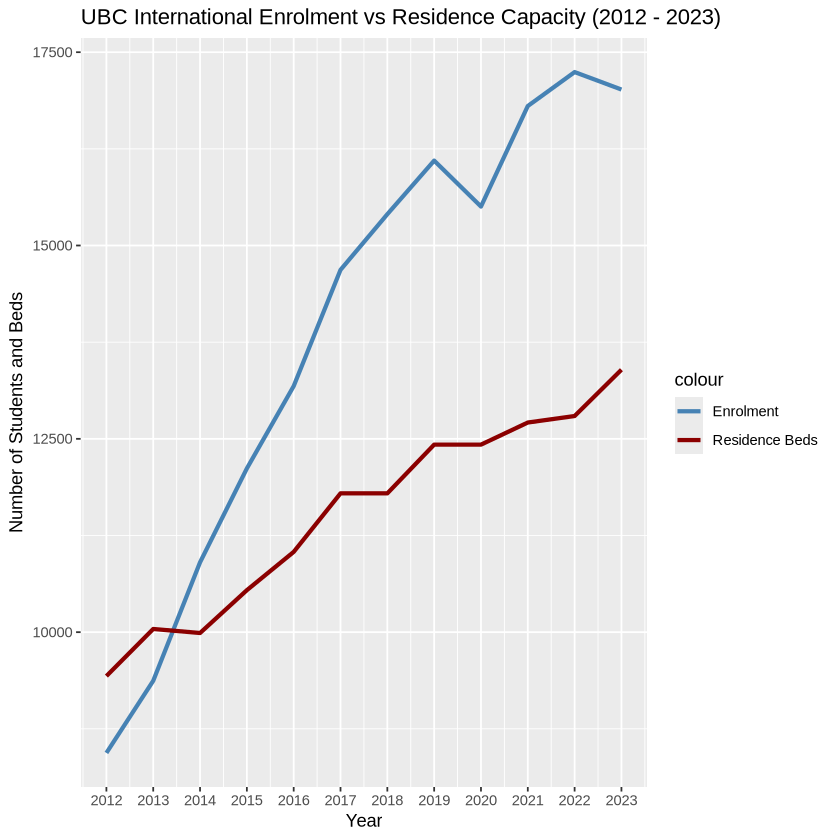

In [21]:
enrolment_vs_beds_plot<-ggplot(combined_data, aes(x = year)) +
                        geom_line(aes(y = enrolment, color = "Enrolment"), size = 1.2) +
                        geom_line(aes(y = beds, color = "Residence Beds"), size = 1.2) +
                        scale_color_manual(values = c("Enrolment" = "steelblue", "Residence Beds" = "darkred")) +
                        scale_x_continuous(breaks = combined_data$year)+
                        ggtitle("UBC International Enrolment vs Residence Capacity (2012 - 2023)")+
                        labs(x = "Year", y = "Number of Students and Beds")
enrolment_vs_beds_plot

In [23]:
combined_data <- combined_data %>%
  arrange(year) %>%
  mutate(
    enrolment_growth = (enrolment / lag(enrolment)) - 1,
    bed_growth = (beds / lag(beds)) - 1
  )
combined_data

year,enrolment,beds,enrolment_growth,bed_growth
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,8438,9432,NA,NA
2013,9371,10041,0.11057123,0.064567430
2014,10903,9989,0.16348309,-0.005178767
2015,12117,10543,0.11134550,0.055461007
2016,13182,11038,0.08789304,0.046950583
2017,14685,11795,0.11401912,0.068581265
2018,15405,11795,0.04902962,0.000000000
2019,16098,12425,0.04498539,0.053412463
2020,15504,12425,-0.03689899,0.000000000
